In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
file=pd.read_csv('S:\\Downloads\\star test file\\TS_15_Feb.csv')

file.describe()

,Price_open,Price_high,Price_low,Price_close,FIB_1_MA,FIB_1_1,FIB_1_2,FIB_1_3,FIB_1_4,FIB_1_5,...,VRSI_4,TTF_Slow_Up,PtoS_Spot,Voli_Hist,Voli_MA,CM_Will_Hist,CM_Stoch_K1,CM_Stoch_D1,CM_Stoch_K2,CM_Stoch_D2
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,...,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,81.707239,84.145429,79.352743,81.832946,78.195688,100.374745,97.138864,91.903099,88.476246,85.049394,...,56.646186,108.577885,10.300235,1.278394,1.277709,10.156711,54.412694,54.422722,54.705990,54.745150
std,105.102866,108.225717,101.937963,105.187260,101.320966,129.639631,125.319109,118.444585,114.033594,109.702525,...,32.339604,45.096717,6.454333,0.942395,0.668325,7.812889,27.192960,26.527490,26.730280,26.092949
min,1.799456,1.836665,1.701332,1.755166,1.966411,2.136052,2.111302,2.071255,2.045044,2.018833,...,0.446963,22.471976,1.393758,0.079153,0.244274,0.573544,4.951463,5.689481,5.775092,6.588573
25%,14.042596,14.378609,13.757950,14.097903,14.254853,16.364573,16.039742,15.496645,15.190913,14.813568,...,25.461286,76.868867,5.539726,0.629271,0.843040,4.244879,28.342045,29.433445,29.840459,30.646333
50%,19.630705,20.149809,19.170553,19.658305,19.945567,23.300080,22.850857,22.134781,21.653223,21.100514,...,60.175177,105.247537,8.516602,1.053733,1.145301,8.200092,57.893171,57.945292,57.570260,56.957862
75%,175.746486,182.935896,169.222307,176.177250,183.712714,220.739294,215.081755,206.620425,200.806863,195.379575,...,88.155244,148.714262,13.871855,1.632442,1.529182,13.924486,80.363986,79.433513,80.978121,80.698339
max,403.995517,414.496252,399.828108,410.400423,321.233988,451.397596,429.114838,393.060579,370.347076,352.834170,...,99.979413,192.721757,31.520495,7.287937,5.813187,61.970532,95.838547,94.844278,95.034640,94.278698


In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 92 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              2999 non-null   object 
 1   Time            2999 non-null   object 
 2   Price_open      2999 non-null   float64
 3   Price_high      2999 non-null   float64
 4   Price_low       2999 non-null   float64
 5   Price_close     2999 non-null   float64
 6   FIB_1_MA        2999 non-null   float64
 7   FIB_1_1         2999 non-null   float64
 8   FIB_1_2         2999 non-null   float64
 9   FIB_1_3         2999 non-null   float64
 10  FIB_1_4         2999 non-null   float64
 11  FIB_1_5         2999 non-null   float64
 12  FIB_1_6         2999 non-null   float64
 13  FIB_1_7         2999 non-null   float64
 14  FIB_1_8         2999 non-null   float64
 15  FIB_1_9         2999 non-null   float64
 16  FIB_1_10        2999 non-null   float64
 17  FIB_1_11        2999 non-null   o

In [4]:
file['Time']=pd.to_datetime(file['Time'])
file=file.drop('ID',axis=1)
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 91 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Time            2999 non-null   datetime64[ns]
 1   Price_open      2999 non-null   float64       
 2   Price_high      2999 non-null   float64       
 3   Price_low       2999 non-null   float64       
 4   Price_close     2999 non-null   float64       
 5   FIB_1_MA        2999 non-null   float64       
 6   FIB_1_1         2999 non-null   float64       
 7   FIB_1_2         2999 non-null   float64       
 8   FIB_1_3         2999 non-null   float64       
 9   FIB_1_4         2999 non-null   float64       
 10  FIB_1_5         2999 non-null   float64       
 11  FIB_1_6         2999 non-null   float64       
 12  FIB_1_7         2999 non-null   float64       
 13  FIB_1_8         2999 non-null   float64       
 14  FIB_1_9         2999 non-null   float64       
 15  FIB_

In [5]:
file=file.set_index('Time')
file=file.replace({' -   ': '0', '_': '0', '-': '0', ',': ''}, regex=True)
file.head()

,Price_open,Price_high,Price_low,Price_close,FIB_1_MA,FIB_1_1,FIB_1_2,FIB_1_3,FIB_1_4,FIB_1_5,...,VIX_Ind_Slow,VIX_Ind_Fast,Voli_Hist,Voli_MA,CM_Will_Hist,CM_Stoch_K1,CM_Stoch_D1,CM_Stoch_K2,CM_Stoch_D2,Hull_Hist
Time,,,,,,,,,,,,,,,,,,,,,
2012-03-16,2.352471,2.392664,2.321998,2.348998,2.055048,2.397114,2.347207,2.266457,2.213604,2.160752,...,0,0,0.901893,0.931612,3.711366,67.443397,74.146745,83.138456,80.863158,0.137471
2012-03-19,2.350735,2.354665,2.302664,2.334998,2.060592,2.407455,2.356849,2.274965,2.221372,2.167778,...,0,0,0.504756,0.854002,4.513109,63.266230,68.674840,82.387786,82.105803,0.148754
2012-03-20,2.342866,2.346664,2.304665,2.328498,2.065897,2.416679,2.365500,2.282692,2.228493,2.174294,...,0,0,0.453839,0.781245,4.430131,61.524041,64.077889,82.387786,82.105803,0.147645
2012-03-21,2.335682,2.353331,2.306665,2.333164,2.071189,2.424925,2.373316,2.289810,2.235155,2.180500,...,0,0,0.564546,0.741845,4.347195,59.529900,61.440057,75.095953,80.207398,0.143529
2012-03-22,2.334423,2.343330,2.286664,2.313664,2.075991,2.432443,2.380437,2.296290,2.241215,2.186140,...,0,0,0.646270,0.724468,5.176597,56.843001,59.298981,75.095953,80.207398,0.132261


<AxesSubplot: xlabel='Time'>

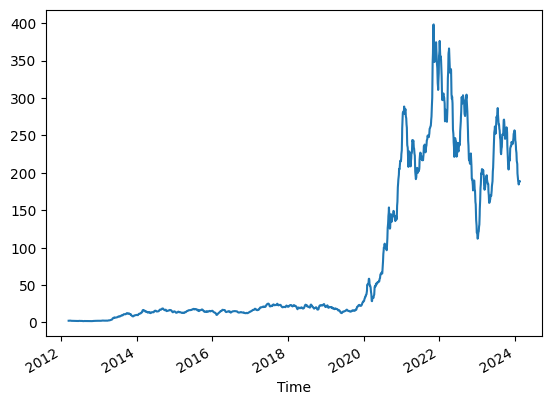

In [21]:
file['TS4_Target'].plot()

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16444\2812942214.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stack_16=file['2016']


<AxesSubplot: xlabel='Time'>

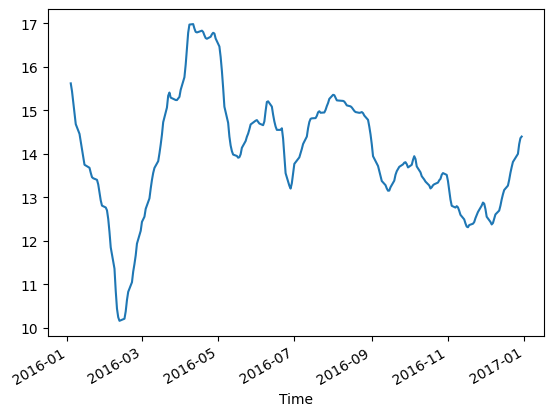

In [22]:
stack_16=file['2016']
target_16=stack_16['TS4_Target']
target_16.plot()

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16444\3496912472.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stack_16=file['2017']


<AxesSubplot: xlabel='Time'>

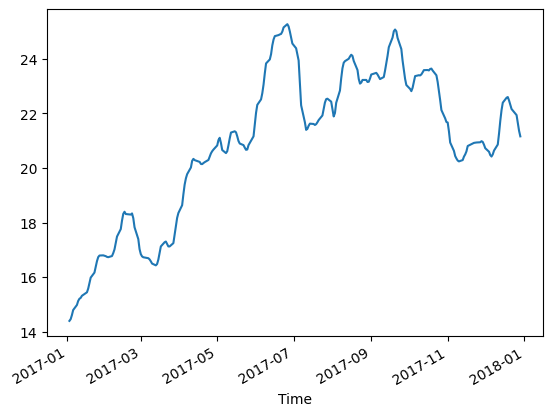

In [24]:
stack_16=file['2017']
target_16=stack_16['TS4_Target']
target_16.plot()

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16444\1862727658.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  stack_16=file['2019']


<AxesSubplot: xlabel='Time'>

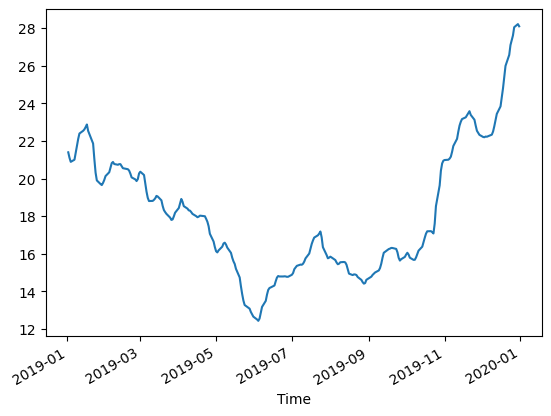

In [25]:
stack_16=file['2019']
target_16=stack_16['TS4_Target']
target_16.plot()

<AxesSubplot: xlabel='y(t)', ylabel='y(t + 1)'>

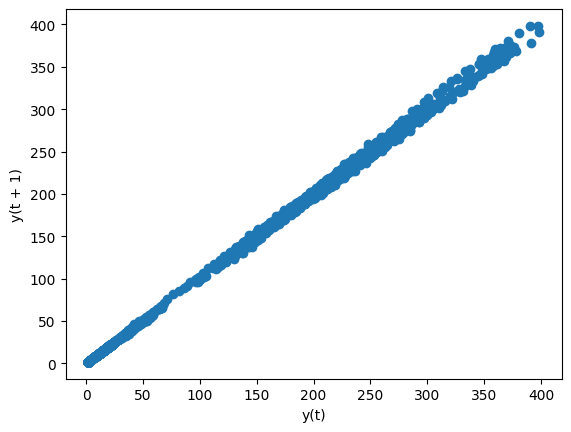

In [34]:
# lag plot for autocorelation between that variable into same variable in time difference of lag =1 year

pd.plotting.lag_plot(file['TS4_Target'],lag=1)

In [35]:
file.columns

Index(['Price_open', 'Price_high', 'Price_low', 'Price_close', 'FIB_1_MA',
       'FIB_1_1', 'FIB_1_2', 'FIB_1_3', 'FIB_1_4', 'FIB_1_5', 'FIB_1_6',
       'FIB_1_7', 'FIB_1_8', 'FIB_1_9', 'FIB_1_10', 'FIB_1_11', 'FIB_1_12',
       'FIB_2_MA', 'FIB_2_1', 'FIB_2_2', 'FIB_2_3', 'FIB_2_4', 'FIB_2_5',
       'FIB_2_6', 'FIB_2_7', 'FIB_2_8', 'FIB_2_9', 'FIB_2_10', 'FIB_2_11',
       'FIB_2_12', 'TS4_level_0', 'TS4_level_1', 'TS4_level_2', 'TS4_Target',
       'TS4_level_4', 'TS4_level_5', 'RSHVB_Middle', 'RSHVB_Up ',
       'RSHVB_Down ', 'JFPCC_Plot', 'T3V_Velocity', 'RSI_MA', 'RSI_Spot',
       'MFI_Spot', 'MFI_MA', 'Senti_Spot', 'Accum_Plot', 'BBWP_Spot',
       'BBWP_MA', 'DMI_Hist', 'DMI_Spot', 'DMI_MA', 'DMI_ADX', 'PMAR_Spot',
       'PMAR_MA', 'Sorch_K', 'Sorch_D', 'WT_Spot', 'WT_MA', 'WT_Hist',
       'VRSI_1', 'VRSI_2', 'VRSI_3', 'VRSI_MA', 'VRSI_4', 'TTF_Slow_Up',
       'TTF_MA', 'TTF_Spot', 'TTF_Slow_Mid', 'PtoE_Spot', 'PtoB_Spot',
       'PtoCF_Spot', 'PtoS_Spot', 'SQZM_Spot', '

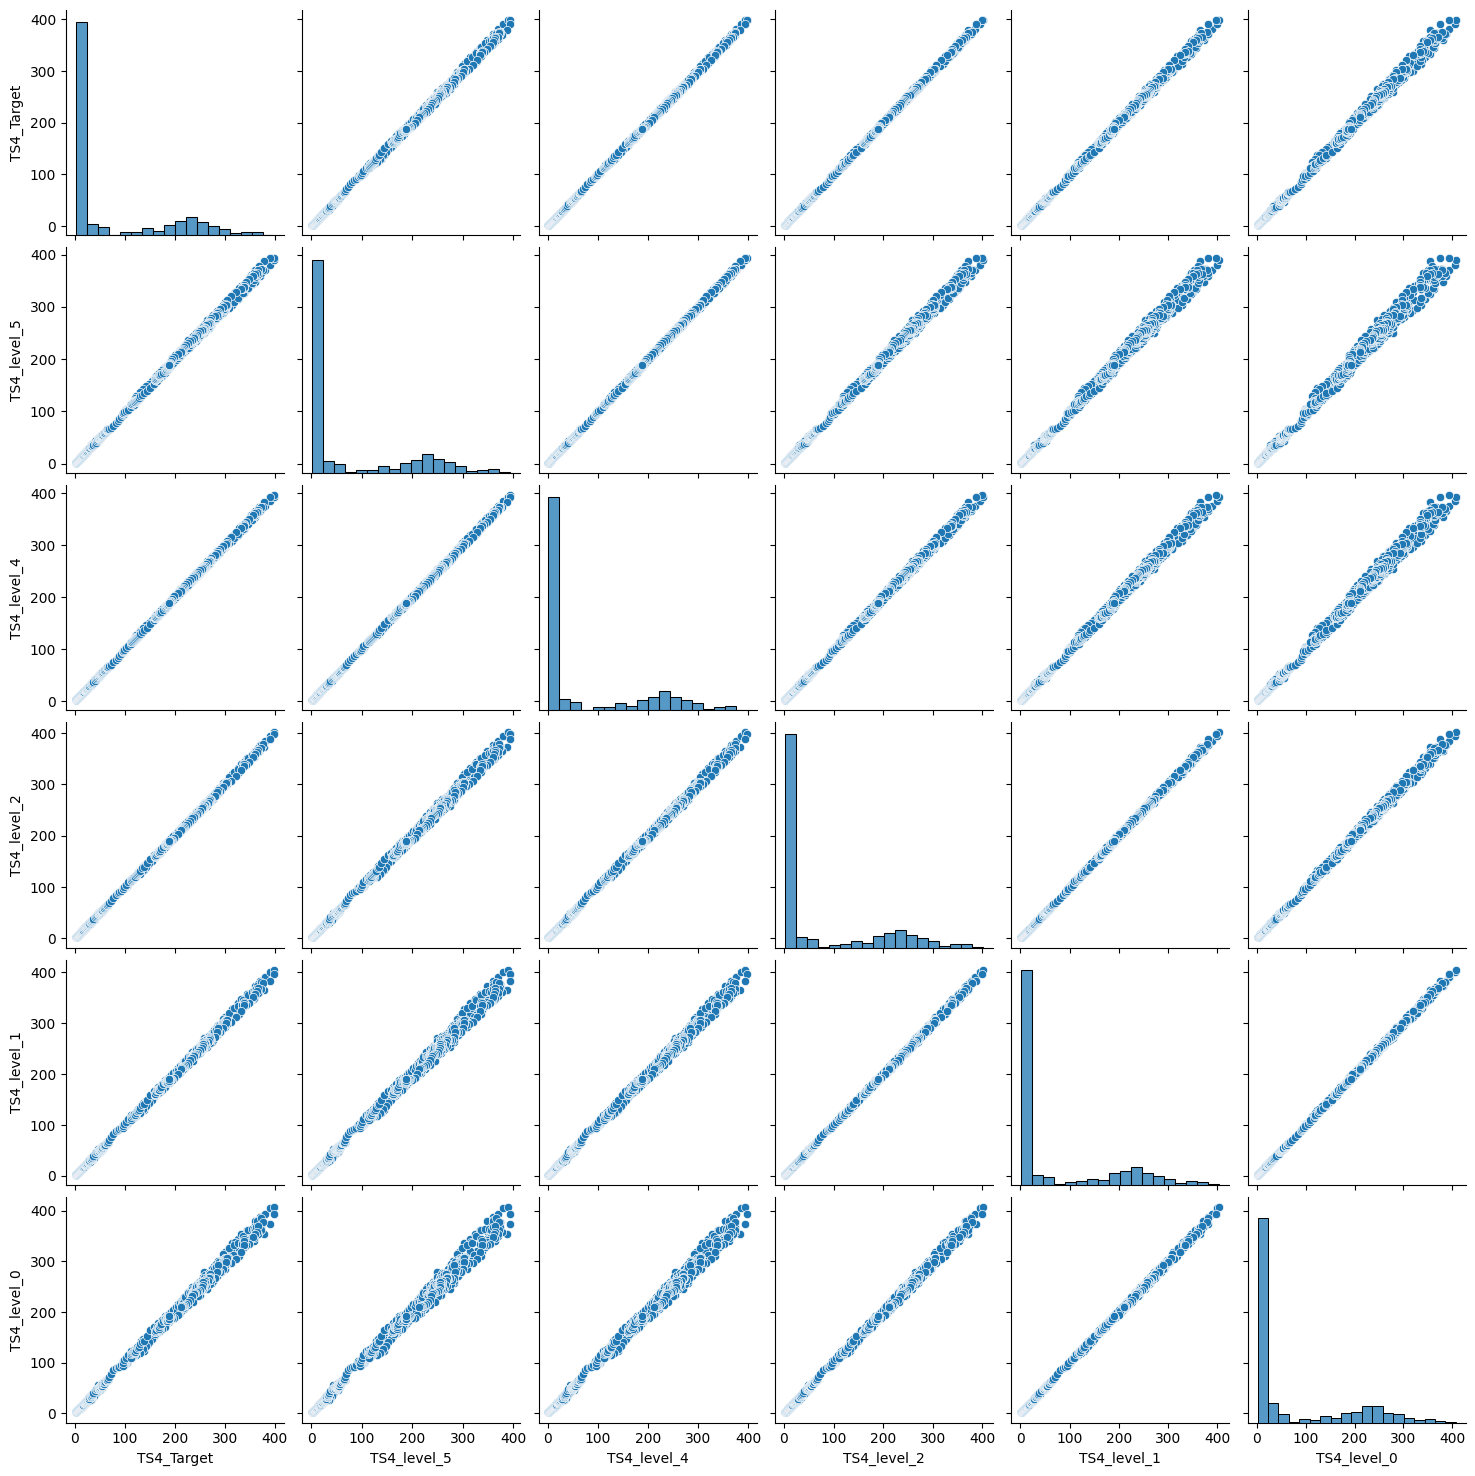

In [36]:
import seaborn as sns

sns.pairplot(file[['TS4_Target','TS4_level_5','TS4_level_4','TS4_level_2','TS4_level_1','TS4_level_0']])

In [37]:
file.corrwith(file['TS4_Target'])

C:\Users\jaisri\AppData\Local\Temp\ipykernel_16444\914963675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  file.corrwith(file['TS4_Target'])


Price_open      0.999963
Price_high      0.999288
Price_low       0.999111
Price_close     0.998924
FIB_1_MA        0.978182
FIB_1_1         0.977530
FIB_1_2         0.979081
FIB_1_3         0.980865
FIB_1_4         0.981388
FIB_1_5         0.981238
FIB_1_6         0.979859
FIB_1_7         0.975738
FIB_1_8         0.969800
FIB_1_9         0.962794
FIB_1_10        0.953349
FIB_2_MA        0.942445
FIB_2_1         0.952634
FIB_2_2         0.956381
FIB_2_3         0.958473
FIB_2_4         0.959950
FIB_2_5         0.961143
FIB_2_6         0.962047
FIB_2_7         0.923469
FIB_2_8         0.904148
FIB_2_9         0.881883
TS4_level_0     0.999460
TS4_level_1     0.999780
TS4_level_2     0.999949
TS4_Target      1.000000
TS4_level_4     0.999955
TS4_level_5     0.999830
RSHVB_Middle    0.997617
RSHVB_Up        0.997828
RSHVB_Down      0.997221
RSI_MA          0.000351
RSI_Spot       -0.017008
MFI_MA         -0.050917
BBWP_MA        -0.046255
PMAR_MA        -0.059388
Sorch_D         0.027820


In [9]:
cols = list(file.iloc[:,1:])
print(cols) 

df_for_training = file[cols].astype(float)

['Price_open', 'Price_high', 'Price_low', 'Price_close', 'FIB_1_MA', 'FIB_1_1', 'FIB_1_2', 'FIB_1_3', 'FIB_1_4', 'FIB_1_5', 'FIB_1_6', 'FIB_1_7', 'FIB_1_8', 'FIB_1_9', 'FIB_1_10', 'FIB_1_11', 'FIB_1_12', 'FIB_2_MA', 'FIB_2_1', 'FIB_2_2', 'FIB_2_3', 'FIB_2_4', 'FIB_2_5', 'FIB_2_6', 'FIB_2_7', 'FIB_2_8', 'FIB_2_9', 'FIB_2_10', 'FIB_2_11', 'FIB_2_12', 'TS4_level_0', 'TS4_level_1', 'TS4_level_2', 'TS4_Target', 'TS4_level_4', 'TS4_level_5', 'RSHVB_Middle', 'RSHVB_Up ', 'RSHVB_Down ', 'JFPCC_Plot', 'T3V_Velocity', 'RSI_MA', 'RSI_Spot', 'MFI_Spot', 'MFI_MA', 'Senti_Spot', 'Accum_Plot', 'BBWP_Spot', 'BBWP_MA', 'DMI_Hist', 'DMI_Spot', 'DMI_MA', 'DMI_ADX', 'PMAR_Spot', 'PMAR_MA', 'Sorch_K', 'Sorch_D', 'WT_Spot', 'WT_MA', 'WT_Hist', 'VRSI_1', 'VRSI_2', 'VRSI_3', 'VRSI_MA', 'VRSI_4', 'TTF_Slow_Up', 'TTF_MA', 'TTF_Spot', 'TTF_Slow_Mid', 'PtoE_Spot', 'PtoB_Spot', 'PtoCF_Spot', 'PtoS_Spot', 'SQZM_Spot', 'VFI_MA', 'VFI_Spot', 'Intensity_Spot', 'VIX_Ind_MA1', 'VIX_Ind_MA2', 'VIX_Ind_MA3', 'VIX_Ind_Slow

In [10]:
# scaler=MinMaxScaler()
# df_for_training_scaled=scaler.fit(cols)

scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [68]:
df_for_training.shape,df_for_training_scaled.shape

((2967, 90), (2967, 90))

In [11]:
trainX = []
trainY = []

n_future = 1   
n_past = 30  

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (2937, 30, 90).
trainY shape == (2937, 1).


In [69]:
trainX.shape[2]

90

In [13]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 64)            39680     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52,129
Trainable params: 52,129
Non-trainable params: 0
_________________________________________________________________


In [14]:
# fit the model
history = model.fit(trainX, trainY, epochs=25, batch_size=16, validation_split=0.1, verbose=1)
model.save('star_pro_weights.h5')

Epoch 1/25
166/166 [==============================] - 9s 25ms/step - loss: 0.9127 - val_loss: 0.1042
Epoch 2/25
166/166 [==============================] - 4s 22ms/step - loss: 0.0761 - val_loss: 0.0747
Epoch 3/25
166/166 [==============================] - 4s 22ms/step - loss: 0.0433 - val_loss: 0.0281
Epoch 4/25
166/166 [==============================] - 3s 20ms/step - loss: 0.0436 - val_loss: 0.0323
Epoch 5/25
166/166 [==============================] - 4s 24ms/step - loss: 0.0365 - val_loss: 0.0386
Epoch 6/25
166/166 [==============================] - 4s 26ms/step - loss: 0.0337 - val_loss: 0.0209
Epoch 7/25
166/166 [==============================] - 4s 21ms/step - loss: 0.0266 - val_loss: 0.0212
Epoch 8/25
166/166 [==============================] - 4s 22ms/step - loss: 0.0298 - val_loss: 0.0214
Epoch 9/25
166/166 [==============================] - 4s 24ms/step - loss: 0.0236 - val_loss: 0.0170
Epoch 10/25
166/166 [==============================] - 3s 18ms/step - loss: 0.0275 - val_lo

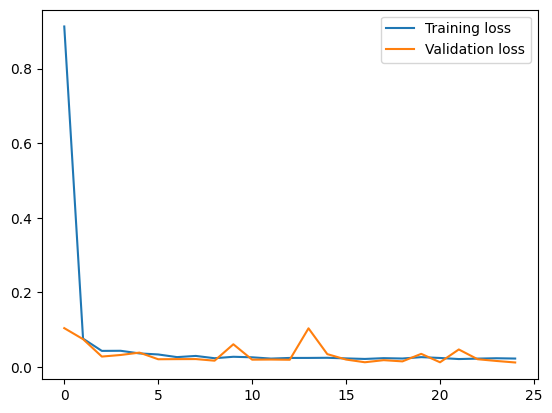

In [15]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [18]:
from tensorflow.keras.models import load_model
model_1=load_model('star_pro_weight.h5', compile=False)

In [19]:
test_datas=pd.read_csv('test_file.csv')

test_dates=pd.to_datetime(test_datas['Time'])

In [57]:
n_past = 0
n_days_for_prediction=25  #let us predict past 15 days

predict_period_dates = pd.date_range(list(test_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
predict_period_dates

# n_past = 20
# n_days_for_prediction=15  #let us predict past 15 days

# predict_period_dates = pd.date_range(list(test_dates)[+ n_past], periods=n_days_for_prediction, freq=us_bd).tolist()
# predict_period_dates

[Timestamp('2024-01-16 00:00:00', freq='C'),
 Timestamp('2024-01-17 00:00:00', freq='C'),
 Timestamp('2024-01-18 00:00:00', freq='C'),
 Timestamp('2024-01-19 00:00:00', freq='C'),
 Timestamp('2024-01-22 00:00:00', freq='C'),
 Timestamp('2024-01-23 00:00:00', freq='C'),
 Timestamp('2024-01-24 00:00:00', freq='C'),
 Timestamp('2024-01-25 00:00:00', freq='C'),
 Timestamp('2024-01-26 00:00:00', freq='C'),
 Timestamp('2024-01-29 00:00:00', freq='C'),
 Timestamp('2024-01-30 00:00:00', freq='C'),
 Timestamp('2024-01-31 00:00:00', freq='C'),
 Timestamp('2024-02-01 00:00:00', freq='C'),
 Timestamp('2024-02-02 00:00:00', freq='C'),
 Timestamp('2024-02-05 00:00:00', freq='C'),
 Timestamp('2024-02-06 00:00:00', freq='C'),
 Timestamp('2024-02-07 00:00:00', freq='C'),
 Timestamp('2024-02-08 00:00:00', freq='C'),
 Timestamp('2024-02-09 00:00:00', freq='C'),
 Timestamp('2024-02-12 00:00:00', freq='C'),
 Timestamp('2024-02-13 00:00:00', freq='C'),
 Timestamp('2024-02-14 00:00:00', freq='C'),
 Timestamp

In [60]:
prediction = model_1.predict(trainX[-n_days_for_prediction:])
prediction

1/1 [==============================] - 0s 56ms/step


array([[1.6005456],
       [1.6017768],
       [1.6163381],
       [1.6317807],
       [1.6587394],
       [1.6419588],
       [1.627451 ],
       [1.6179268],
       [1.6115149],
       [1.6109508],
       [1.6025939],
       [1.5968477],
       [1.5805805],
       [1.564219 ],
       [1.5549974],
       [1.5830196],
       [1.604712 ],
       [1.6156466],
       [1.6240969],
       [1.6161313],
       [1.6119678],
       [1.6086887],
       [1.6010267],
       [1.6020567],
       [1.5877414]], dtype=float32)

In [ ]:
def data_pre_pro (file):
    
    file_dated=pd.to_datetime(file['Time'])
    file=file.replace({' -   ': '0', '_': '0', '-': '0', ',': ''}, regex=True)
    
    cols = list(file.iloc[:,1:])
    df_for_training = file[cols].astype(float)
    
    scaler = StandardScaler()
    scaler = scaler.fit(df_for_training)
    df_for_training_scaled = scaler.transform(df_for_training)

    trainX = []
    trainY = []

    n_future = 1   
    n_past = 30 

    for i in range(n_past, len(df_for_training_scaled) - n_future +1):
        trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
        trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

    trainX, trainY = np.array(trainX), np.array(trainY)

    return trainX, trainY, file_dated, file['TS4_Target'] 


array([[[-0.74420684, -0.74458376, -0.74485041, ...,  1.05617497,
          0.99432803, -0.05047865],
        [-0.74422341, -0.74493581, -0.74504064, ...,  1.02790861,
          1.04226212, -0.04994311],
        [-0.74429852, -0.74500994, -0.74502096, ...,  1.02790861,
          1.04226212, -0.04999575],
        ...,
        [-0.7461735 , -0.74637494, -0.74666088, ..., -1.43633317,
         -1.54952203, -0.06627245],
        [-0.7460738 , -0.7460476 , -0.74647504, ..., -1.43633317,
         -1.54952203, -0.06298271],
        [-0.74579803, -0.74597965, -0.74619078, ..., -1.34723909,
         -1.48101735, -0.06050774]],

       [[-0.74422341, -0.74493581, -0.74504064, ...,  1.02790861,
          1.04226212, -0.04994311],
        [-0.74429852, -0.74500994, -0.74502096, ...,  1.02790861,
          1.04226212, -0.04999575],
        [-0.7443671 , -0.74494817, -0.74500128, ...,  0.75333576,
          0.96903259, -0.05019111],
        ...,
        [-0.7460738 , -0.7460476 , -0.74647504, ..., -

In [61]:
testX,testY=data_pre_pro(test_datas)

In [63]:
prediction = model_1.predict(testX[-n_days_for_prediction:])
prediction

ValueError: Unexpected result of `predict_function` (Empty batch_outputs). Please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

In [46]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [47]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())

In [48]:
df_forecast = pd.DataFrame({'Time':np.array(forecast_dates), 'TS4_Target':y_pred_future})
df_forecast['Time']=pd.to_datetime(df_forecast['Time'])

In [30]:
original = test_datas[['Time', 'TS4_Target']]
original['Time']=pd.to_datetime(original['Time'])
original = original.loc[original['Time'] >= '2024-05-01']
original['Time']

C:\Users\jaisri\AppData\Local\Temp\ipykernel_18304\1097334507.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Time']=pd.to_datetime(original['Time'])


Series([], Name: Time, dtype: datetime64[ns])

<AxesSubplot: ylabel='TS4_Target'>

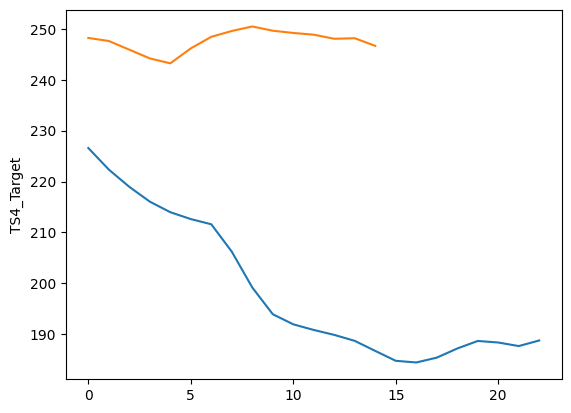

In [36]:
import seaborn as sns

sns.lineplot(test_datas['TS4_Target'])
sns.lineplot(df_forecast['TS4_Target'])

<AxesSubplot: >

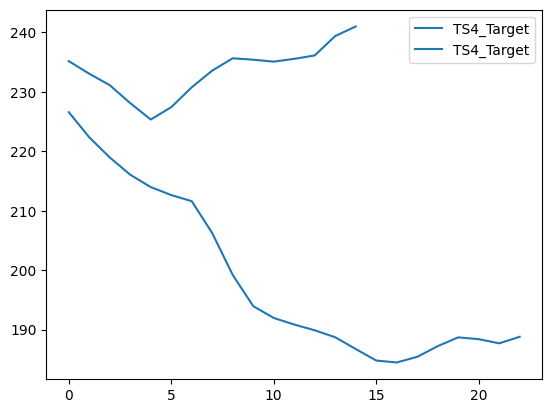

In [119]:
import seaborn as sns

sns.lineplot((test_datas['Time'], test_datas['TS4_Target']))
sns.lineplot((df_forecast['Time'], df_forecast['TS4_Target']))